# Algorithm for finding the closest pair of points in a set of 3D points

In [1]:
# Algorithm for finding the closest pair of points in a set of 3D points
# Using a divide and conquer approach

import numpy as np
import math
import sys
import time

class Point:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    
    def __str__(self):
        return f"({self.x}, {self.y}, {self.z})"
    
    def __repr__(self):
        return f"({self.x}, {self.y}, {self.z})"

def distance(p1, p2):
    return math.sqrt((p1.x - p2.x)**2 + (p1.y - p2.y)**2 + (p1.z - p2.z)**2)

def closest_pair(points):
    # Sort points by x-coordinate
    points.sort(key=lambda p: p.x)
    points.sort(key=lambda p: p.y)
    return closest_pair_rec(points)

def closest_pair_rec(points):
    n = len(points)
    if n <= 3:
        return brute_force(points)

    mid = n // 2

    left = points[:mid]
    right = points[mid:]

    left_pair = closest_pair_rec(left)
    right_pair = closest_pair_rec(right)

    delta = min(left_pair[0], right_pair[0])

    split_pair = closest_pair_split(points, delta)

    if split_pair is not None:
        return split_pair
    elif left_pair[0] < right_pair[0]:
        return left_pair
    else:
        return right_pair
    

def brute_force(points):
    n = len(points)
    best = sys.maxsize
    best_pair = None
    for i in range(n):
        for j in range(i+1, n):
            p1 = points[i]
            p2 = points[j]
            d = distance(p1, p2)
            if d < best:
                best = d
                best_pair = (d, p1, p2)

    return best_pair

def closest_pair_split(points, delta):
    n = len(points)
    mid = n // 2
    mid_x = points[mid].x

    # Create a list of points within delta distance of the middle x-coordinate
    strip = [p for p in points if abs(p.x - mid_x) < delta]

    # Sort points by y-coordinate
    strip.sort(key=lambda p: p.y)

    best = delta
    best_pair = None
    for i in range(len(strip)):
        for j in range(i+1, min(i+8, len(strip))):
            p1 = strip[i]
            p2 = strip[j]
            d = distance(p1, p2)
            if d < best:
                best = d
                best_pair = (d, p1, p2)

    return best_pair

In [5]:
%matplotlib qt

In [2]:
%matplotlib widget

[(18, 47, 12), (92, 36, 46), (37, 8, 78), (20, 65, 58), (6, 93, 29), (95, 72, 53), (8, 93, 45), (40, 41, 99), (7, 32, 10), (44, 58, 87), (60, 68, 94), (25, 16, 48), (65, 32, 56), (11, 74, 79), (74, 38, 68), (3, 6, 9), (70, 20, 31), (6, 62, 83), (81, 17, 51), (96, 8, 69), (30, 17, 36), (56, 6, 93), (81, 39, 53), (16, 15, 47), (75, 90, 78), (66, 31, 6), (96, 96, 89), (41, 8, 49), (67, 90, 7), (32, 83, 53), (50, 29, 49), (5, 37, 46), (13, 9, 8), (12, 78, 95), (4, 15, 78), (20, 50, 39), (31, 73, 97), (88, 71, 17), (60, 20, 73), (98, 25, 7), (75, 78, 6), (75, 23, 11), (77, 14, 37), (68, 90, 68), (12, 40, 38), (31, 97, 45), (64, 58, 11), (20, 55, 22), (42, 33, 74), (58, 1, 11)]
Closest pair: (16, 15, 47) and (25, 16, 48) with distance 9.1104335791443
Time: 0.000476837158203125


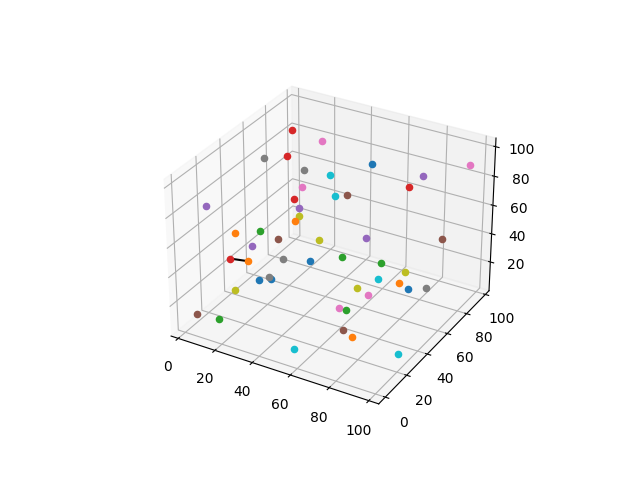

In [4]:
import matplotlib.pyplot as plt

points = [Point(np.random.randint(0, 100), np.random.randint(0, 100), np.random.randint(0, 100)) for _ in range(50)]
print(points)
# Show 3D points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for p in points:
    ax.scatter(p.x, p.y, p.z)

start = time.time()
min_dist, p1, p2 = closest_pair(points)
end = time.time()
print(f"Closest pair: {p1} and {p2} with distance {min_dist}")
print(f"Time: {end - start}")
ax.plot([p1.x, p2.x], [p1.y, p2.y], [p1.z, p2.z], color='black')
plt.show()
